In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

bot_token = os.getenv("SLACK_BOT_TOKEN")
app_token = os.getenv("SLACK_APP_TOKEN")

# if not bot_token or not app_token:
#     raise ValueError("Missing Slack tokens in environment variables.")

In [2]:
from data_loaders.sitemap_entry import Sitemap

sitemap = Sitemap(sitemap="https://tech.appunite.com/blog/blog-sitemap.xml")
sitemap_entries = sitemap.load()

urls = [entry.url for entry in sitemap_entries]

In [3]:
from data_loaders.document_processor import DocumentProcessor

document_processor = DocumentProcessor('au-blog-rag')

/Users/filipkozlowski/Documents/github/au-blog-rag/.venv/lib/python3.11/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Index 'au-blog-rag' created.


In [4]:
document_processor.load_documents(urls=urls)

Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/proposing-architectural-changes
Error processing https://tech.appunite.com/blog/why-should-you-consider-using-flutter-for-your-next-mobile-project: 404 Client Error: Not Found for url: https://web.appunite.com/blog/why-should-you-consider-using-flutter-for-your-next-mobile-project?redirected=true
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/google-i-o-2024-keynote-announcements
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/the-journey-of-an-app-uniter-szymon
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/how-to-write-a-project-brief
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/enable-bitcode-flag-in-unity
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/how-to-build-great-software-products
Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/scrum-defaults-not-rules
Skipping invalid or inacc

Found 778 documents.
Unique URLS: 74
Total documents: 778

Total length: 585245
Average length: 752.2429305912597
Max length: 999

Total tokens: 127006
Average tokens: 163.24678663239075
Max tokens: 321


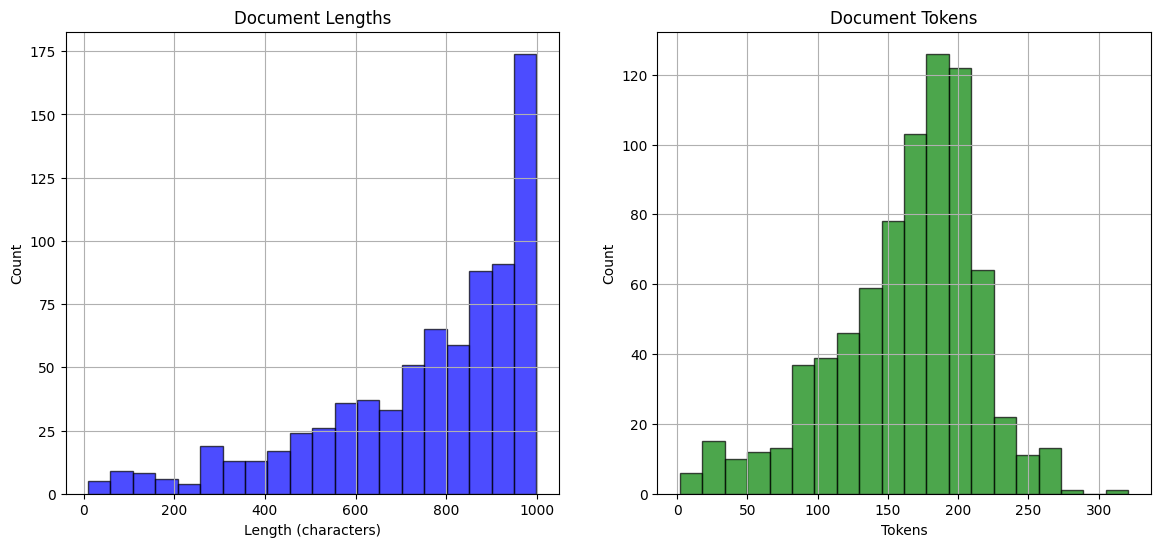

In [5]:
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd 

def count_tokens(text, model="gpt-4o-mini"):
    encoding = tiktoken.encoding_for_model(model)
    tokens = encoding.encode(text)
    return len(tokens)

docs = document_processor.get_all_documents()
print(f"Unique URLS: {len(set([doc['metadata']['source'] for doc in docs]))}")

lengths = [len(doc['content']) for doc in docs]
tokens = [count_tokens(doc['content']) for doc in docs]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.Series(lengths).hist(bins=20, alpha=0.7, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Document Lengths')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Count')

pd.Series(tokens).hist(bins=20, alpha=0.7, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Document Tokens')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Count')


print(f"Total documents: {len(lengths)}\n")

print(f"Total length: {sum(lengths)}")
print(f"Average length: {sum(lengths)/len(lengths)}")
print(f"Max length: {max(lengths)}\n")

print(f"Total tokens: {sum(tokens)}")
print(f"Average tokens: {sum(tokens)/len(tokens)}")
print(f"Max tokens: {max(tokens)}")

In [6]:
from rag_query.query_handler import QueryHandler

rag_system = QueryHandler(
    vector_store=document_processor.vectorstore
)

USER_AGENT environment variable not set, consider setting it to identify your requests.


Pinecone initialized successfully.


In [7]:
query = "We're discussing with a prospect client that wants to implement an AI feature in the app. Please show me article about our experience and knowledge"
answer = rag_system.get_answer(query)

/Users/filipkozlowski/Documents/github/au-blog-rag/src/rag_query/query_handler.py:54: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  return [loads(doc) for doc in unique_docs]


DEBUG: Retrieved 17 documents
Document 1:
  Page Content: - All
    - Engineering
    - Business
    - Product Management
    - People & Teamwork
    - Design & UX
    - Today I Learned

<!-- image -->

<!-- image -->

<!-- image -->

Tomasz Lewandowski

iOS & Flutter & Game Developer

<!-- image -->

<!-- image -->

# Introduction to Reactive Programming in Unity

<!-- image -->

<!-- image -->

# Introduction...
  Metadata: {'source': 'https://tech.appunite.com/blog/introduction-to-reactive-programming-in-unity', 'start_index': 0.0}
Document 2:
  Page Content: call was a screening that most of us know well - few words about company, expectations, brief chat in English (since the company is based in Poland and that's the language we mainly communicated in during the screening)....
  Metadata: {'source': 'https://tech.appunite.com/blog/how-to-become-junior-elixir-developer', 'start_index': 1951.0}
Document 3:
  Page Content: - We decided to make the office bigger and more comfortable. 

/Users/filipkozlowski/Documents/github/au-blog-rag/src/rag_query/query_handler.py:120: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = llm(messages)


Skipping invalid or inaccessible URL: https://tech.appunite.com/blog/are-you-asking-yourself-why-customized-e-commerce-is-still-a-good-choice-1


In [8]:
for i, doc in enumerate(answer):
    print(f"****** {i + 1} ******\n"
          f"URL: {doc['url']}\n"
          f"Analysis: {doc['analysis']}\n")

****** 1 ******
URL: https://tech.appunite.com/blog/how-to-become-junior-elixir-developer
Analysis: The article details the author's journey from having no experience in Elixir to becoming a Junior Elixir Developer at Appunite. It describes the challenges faced during the application and interview process, including a technical interview that involved live coding. Despite initial struggles, the author was offered the job and has since gained confidence and independence in their role. The key takeaway is that curiosity and the willingness to learn can lead to success, even without prior experience in a specific technology.

The article does not provide specific information about Appunite's experience and knowledge in implementing AI features in applications.

****** 2 ******
URL: https://tech.appunite.com/blog/introduction-to-reactive-programming-in-unity
Analysis: The article discusses reactive programming in Unity, focusing on implementing an AI feature using UniRx, a reactive extensi